# Chemical Research Scientist

The given file 'data.xlsx' contains the details of a particular chemical's **critical point**, **pressure** and **isotope** corresponding to its **temperature** in degrees as per the existing research work of scientists.
*(Isotope column is required for BONUS question only!)*

**Important research details:**
1. The chemical check is impossible at temperature above 100 degrees.
2. The critical point is always positive.
3. The critical point of the chemical should not cross 15.
4. One scientist accidentally experimented at 100 degrees and the critical point was reported as 9.2. So, it gives a basis to the research that the predicted critical point will be around 8 to 12.

With the given information, use the **most suitable machine learning algorithm** and **predict the most appropriate value of critical point for 80, 90 and 100 degrees each.**.
**Also predict the pressure for above temperatures.**

**Process to be followed:**
1. Initially plot the graphs for data visualisation.
2. Split your data into training and testing data set. It should be a 80:20 split with any random state of your choice.
3. Use appropriate machine learning model to predict the values of critical point and pressure. (Keep in consideration, the "Imporatant research details" mentioned above.)
4. Find Mean Square Error (MSE) for both the cases.
4. Predict the most appropriate value of both, critical point and pressure at 80, 90 and 100 degrees each.
5. Also write a brief statement why you think both of your predictions are correct.

**Important instructions**

Plot graphs wherever required.
Graphs should contain proper labels, axis, legend, grid, colour map, etc. whichever is applicable for better interpretation.

**BONUS QUESTION**

The chemical has 3 isotopes named, A,B and C (as mentioned in file). **The type of isotope is dependent on critical point and pressure only.** Perform classification of the following chemical based on isotopes and perform following:
1. Find the minimum value of max_depth required to get a perfect classification.
2. Print confusion matrix and number of total error points in testing.
3. Plot the heat map of confusion matrix and the contour plot of classification.

In [1]:
import pandas as pd

df = pd.read_excel('data.xlsx')
df.head()

,temp,critical_point,pressure,isotope
0,0,2.00,8.50,A
1,1,2.05,8.46,A
2,2,2.01,8.42,A
3,3,2.03,8.35,A
4,4,2.05,8.30,A


In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['critical_point'],df['temp'])

plt.title('Critical Point Vs Temperature')
plt.xlabel('Critical Point')
plt.ylabel('Temperature')

Text(0,0.5,'Temperature')

Text(0,0.5,'Temperature')

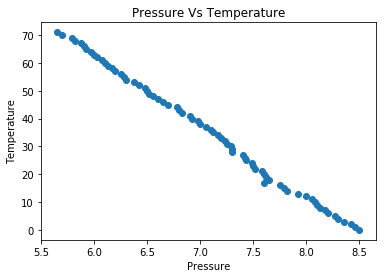

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['pressure'],df['temp'])

plt.title('Pressure Vs Temperature')
plt.xlabel('Pressure')
plt.ylabel('Temperature')

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(df['temp'],df[['critical_point']],test_size=0.2,random_state=980)

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

PFeatures = PolynomialFeatures(degree = 4)

Quad_train = PFeatures.fit_transform(x_train.values.reshape(-1,1))
Quad_test=PFeatures.fit_transform(x_test.values.reshape(-1,1))

In [6]:
Pmodel = LinearRegression()
Pmodel.fit(Quad_train, y_train)
obtained_Y_test=Pmodel.predict(Quad_test)


In [7]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,obtained_Y_test)
print("MSE: {}".format(mse))

MSE: 0.019088415594961442


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df['temp'],df['pressure'],test_size=0.2,random_state=25)

In [9]:
model=LinearRegression()
model.fit(X_train.values.reshape(-1,1),Y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
obtained_Y_test=model.predict(X_test.values.reshape(-1,1))

mse=mean_squared_error(y_true=Y_test,y_pred=obtained_Y_test)
print("MSE: {}".format(mse))

MSE: 0.0012129925885273514


In [11]:
Pmodel.predict(PFeatures.fit_transform(pd.DataFrame([80,90,100]).values.reshape(-1,1)))

array([[ 3.90412391],
       [ 6.10056821],
       [11.03162678]])

In [24]:
model.predict((pd.DataFrame([80,90,100]).values.reshape(-1,1)))

array([5.33701771, 4.95074324, 4.56446877])

In [12]:
iso={'A':0,'B':1,'C':2}
df['isotope']=df['isotope'].apply(lambda x: iso[x])
df.head()

,temp,critical_point,pressure,isotope
0,0,2.00,8.50,0
1,1,2.05,8.46,0
2,2,2.01,8.42,0
3,3,2.03,8.35,0
4,4,2.05,8.30,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree=decisiontree.fit(df[['critical_point','pressure']],df['isotope'])

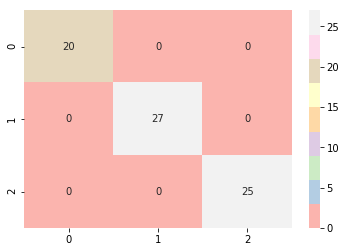

In [14]:
import seaborn as sb
Predicted_Species=obtained_tree.predict(df[['critical_point','pressure']])
sb.heatmap(confusion_matrix(df['isotope'],Predicted_Species),annot=True,cmap='Pastel1')

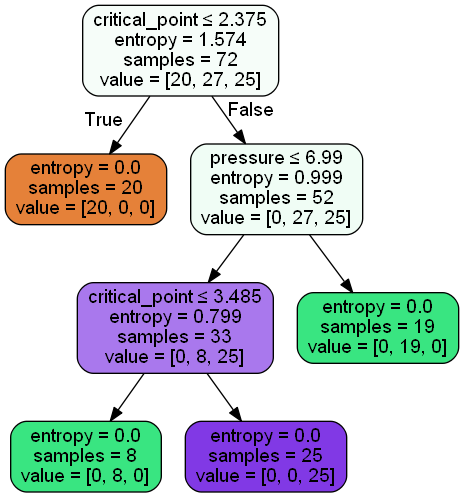

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

from io import StringIO
DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=
                ['critical_point','pressure'],special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [16]:
confusion_matrix(df['isotope'],Predicted_Species)

array([[20,  0,  0],
       [ 0, 27,  0],
       [ 0,  0, 25]], dtype=int64)

In [17]:
print(classification_report(df['isotope'],Predicted_Species))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        27
          2       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00        72



In [50]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


a = df[df['isotope']==0][['critical_point','pressure','isotope']]
b = df[df['isotope']==1][['critical_point','pressure','isotope']]
c = df[df['isotope']==2][['critical_point','pressure','isotope']]

x_train, x_test, y_train, y_test = train_test_split\
(df[['critical_point','pressure']],df['isotope'],test_size=0.2,random_state=0)

from sklearn.svm import SVC
SVCClassifier=SVC(kernel='linear',C=500,max_iter=100000)


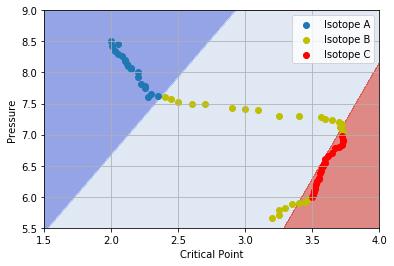

In [51]:
import numpy as np
x_min,x_max=1.5,4
y_min,y_max=5.5,9
xx,yy=np.meshgrid(np.arange(x_min,x_max,.001),np.arange(y_min,y_max,.001))
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_input=np.c_[xx_lin,yy_lin]


SVC_Z=SVCModel.predict(pred_input)
SVC_Z=SVC_Z.reshape(xx.shape)

plt.contourf(xx,yy,SVC_Z,cmap=plt.cm.coolwarm, alpha = 0.6)
plt.scatter(a['critical_point'],a['pressure'],label='Isotope A')
plt.scatter(b['critical_point'],b['pressure'],color='y',label='Isotope B')
plt.scatter(c['critical_point'],c['pressure'],color='r',label='Isotope C')
plt.xlabel('Critical Point')
plt.ylabel('Pressure')
plt.legend()
plt.axis([1.5,4,5.5,9])
plt.grid()
plt.show()
